In [ ]:
# liabraries for data manipulation
import pandas as pd

# libraries for data visualization
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# libraries for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# libraries evaluation
from sklearn.metrics import recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# libraries for ignore warning after run code
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset dan menampilkan 5 teratas
df = pd.read_csv('/content/smoke_detection_iot.csv',index_col = False)
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [ ]:
# menghapus kolom yang tidak berguna
df = df.drop(columns='Unnamed: 0')

In [ ]:
# melihat dimensi dari dataset
print("Row: {}, Columns: {}".format(df.shape[0], df.shape[1]))

Row: 62630, Columns: 15


# Exploratory data analysis

## Exploratory Data Analysis - Deskripsi Variabel:

In [ ]:
df.info

<bound method DataFrame.info of               UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0      1654733331          20.000        57.36          0        400   12306   
1      1654733332          20.015        56.67          0        400   12345   
2      1654733333          20.029        55.96          0        400   12374   
3      1654733334          20.044        55.28          0        400   12390   
4      1654733335          20.059        54.69          0        400   12403   
...           ...             ...          ...        ...        ...     ...   
62625  1655130047          18.438        15.79        625        400   13723   
62626  1655130048          18.653        15.87        612        400   13731   
62627  1655130049          18.867        15.84        627        400   13725   
62628  1655130050          19.083        16.04        638        400   13712   
62629  1655130051          19.299        16.52        643        400   13696   

       

In [ ]:
# melihat info dari dataset
info = []
col = df.columns.tolist()
for i in col:
  info.append(df[i].dtype)

info1 = pd.DataFrame(info, col, columns=['Type'])
info1

,Type
UTC,int64
Temperature[C],float64
Humidity[%],float64
TVOC[ppb],int64
eCO2[ppm],int64
Raw H2,int64
Raw Ethanol,int64
Pressure[hPa],float64
PM1.0,float64
PM2.5,float64


In [ ]:
# melihat deskriptf statistik
df.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


## Exploratory Exploratory Data Analysis - Menangani Missing Value dan Outliers:

In [ ]:
# melihat missing value
Total = df.isnull().sum().sort_values(ascending=False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
UTC,0,0.0
Temperature[C],0,0.0
Humidity[%],0,0.0
TVOC[ppb],0,0.0
eCO2[ppm],0,0.0
Raw H2,0,0.0
Raw Ethanol,0,0.0
Pressure[hPa],0,0.0
PM1.0,0,0.0
PM2.5,0,0.0


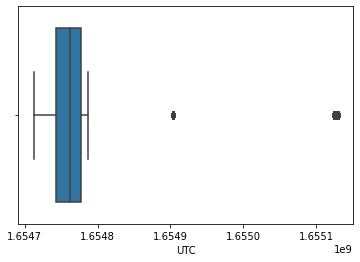

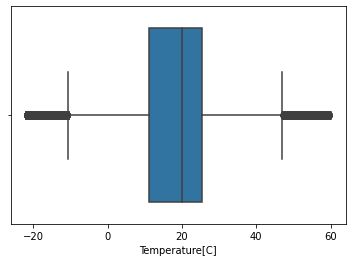

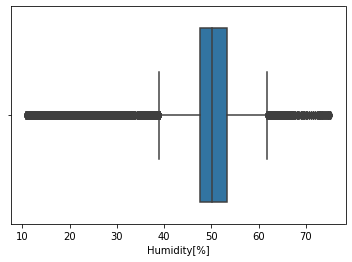

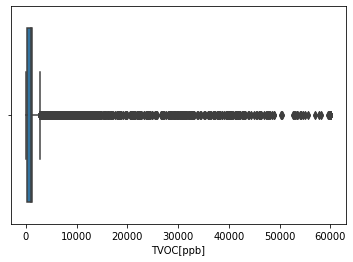

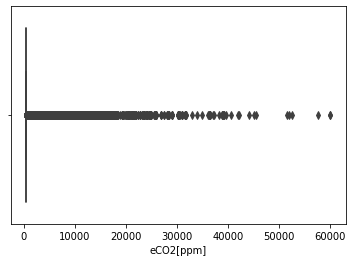

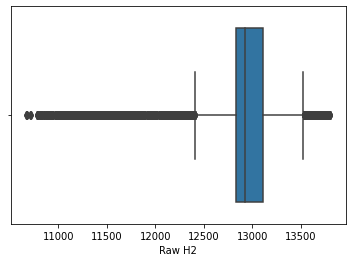

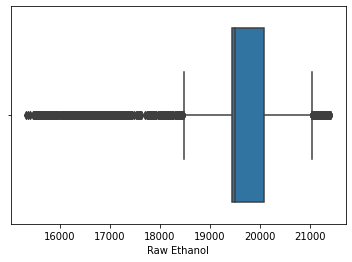

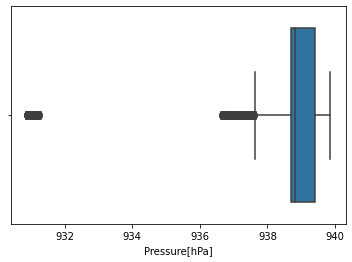

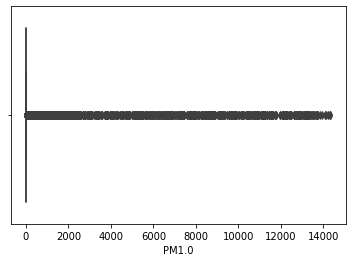

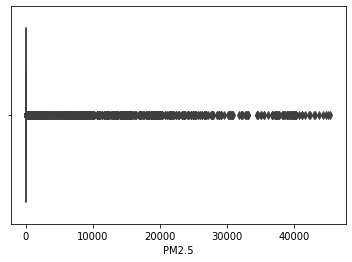

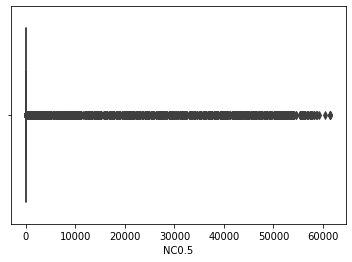

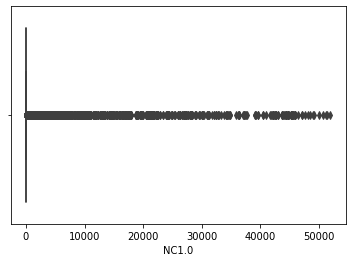

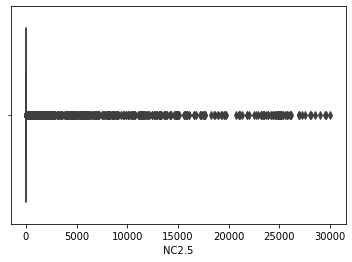

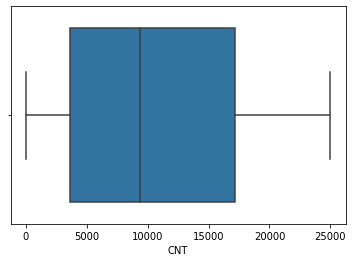

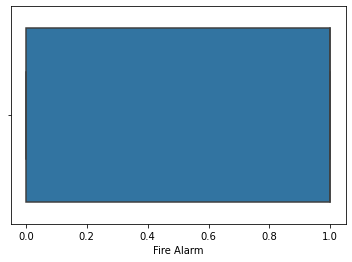

In [ ]:
# melihat outliers
cols = df.columns
for i, col in enumerate(cols):
  sns.boxplot(x=df[col])
  plt.show()

## Exploratory Data Analysis - Univariate Analysis:

In [ ]:
# melihat proporsi pada feature target
trace = go.Pie(labels = ['Yes_Fire', 'No_Fire'], values = df['Fire Alarm'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['ldarkblue','orange'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of Fire Alarm variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

## Exploratory Data Analysis - Multivariate Analysis:

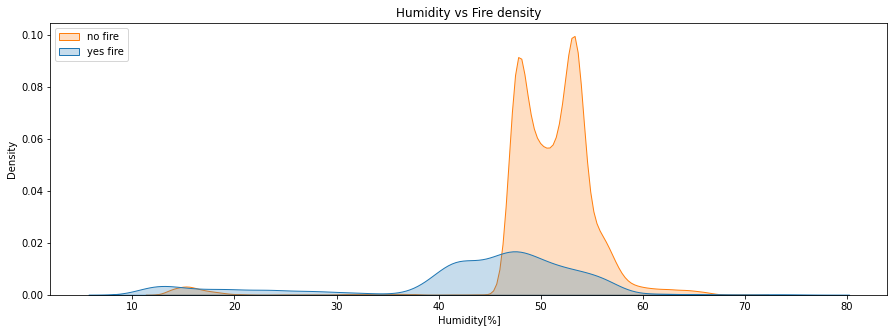

In [ ]:
# melihat hubungan humidity dengan variabel target
plt.figure(figsize=(15,5))
sns.kdeplot( data=df, x='Humidity[%]', hue='Fire Alarm', fill = True)
plt.legend(loc='upper left', labels=['no fire', 'yes fire'])
plt.title('Humidity vs Fire density')
plt.show()

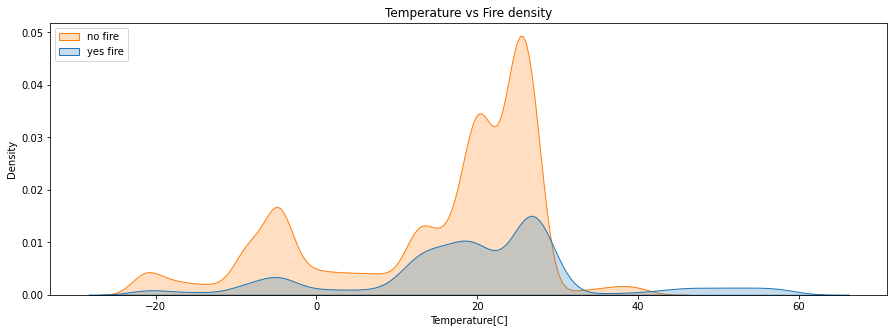

In [ ]:
# melihat hubungan temperatur dengan variabel target
plt.figure(figsize=(15,5))
sns.kdeplot( data=df, x='Temperature[C]', hue='Fire Alarm', fill = True)
plt.legend(loc='upper left', labels=['no fire', 'yes fire'])
plt.title('Temperature vs Fire density')
plt.show()

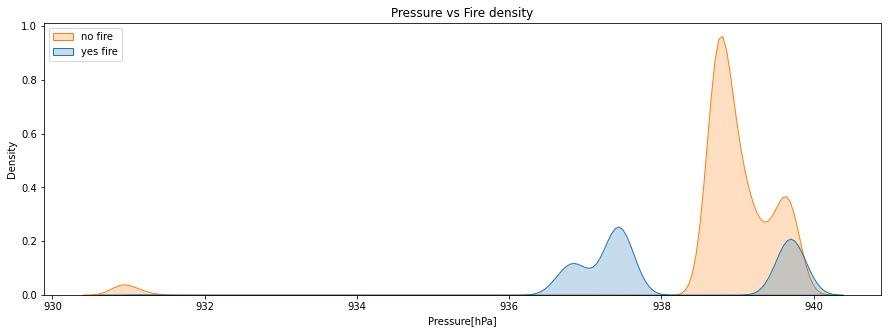

In [ ]:
# melihat hubungan pressure dengan variabel target
plt.figure(figsize=(15,5))
sns.kdeplot( data=df, x='Pressure[hPa]', hue='Fire Alarm', fill = True)
plt.legend(loc='upper left', labels=['no fire', 'yes fire'])
plt.title('Pressure vs Fire density')
plt.show()

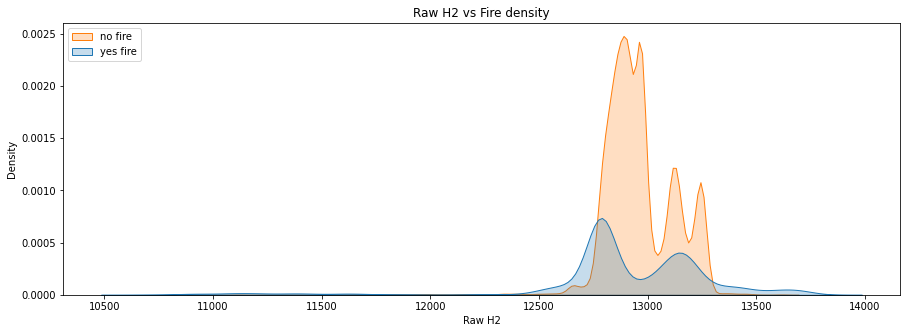

In [ ]:
# melihat hubungan Raw H2 dengan variabel target
plt.figure(figsize=(15,5))
sns.kdeplot( data=df, x='Raw H2', hue='Fire Alarm', fill = True)
plt.legend(loc='upper left', labels=['no fire', 'yes fire'])
plt.title('Raw H2 vs Fire density')
plt.show()

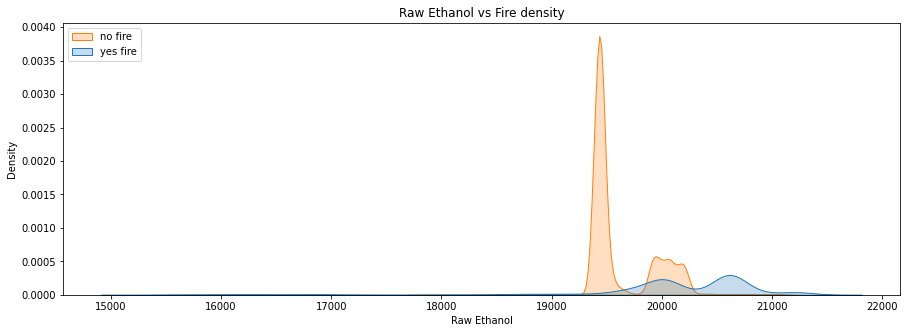

In [ ]:
# melihat hubungan Raw Ethanol dengan variabel target
plt.figure(figsize=(15,5))
sns.kdeplot( data=df, x='Raw Ethanol', hue='Fire Alarm', fill = True)
plt.legend(loc='upper left', labels=['no fire', 'yes fire'])
plt.title('Raw Ethanol vs Fire density')
plt.show()

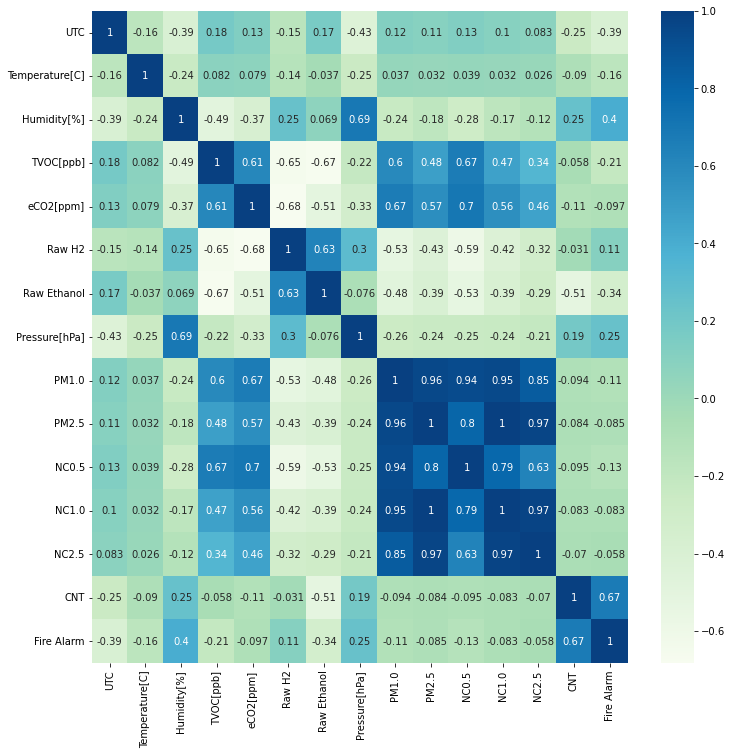

In [ ]:
# melihat korelasi dari tiap feature yang ada
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),annot = True,cmap = 'GnBu')
plt.show()

# Data Preparation

## Feature Selection

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [ ]:
for col in df.columns.tolist():
    print(df[col].value_counts().count())
    print('\n')

62630


21672


3890


1966


1713


1830


2659


2213


1337


1351


3093


4113


1161


24994


2




menghapus kolom UTC karena tidak berpengaruh pada model machine learning

In [ ]:
df = df.drop(columns='UTC')
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


## Principal Component Analysis (PCA)

Disini kita akan lakukan PCA untuk mereduksi feature yang ada sehingga model dapat dengan mudah mendapatkan pola dari dataset kita.

feature yang akan kita lakukan PCA adalah PM1.0, PM2.5, NC0.5, NC1.0 dan NC2.5 karena pada feature tersebut memiliki korelasi positif yang tinggi

In [ ]:
pca = PCA(n_components=5, random_state=42)
pca.fit(df[['PM1.0', 'PM2.5', 'NC0.5', 'NC1.0','NC2.5']])
princ_comp = pca.transform(df[['PM1.0', 'PM2.5', 'NC0.5', 'NC1.0','NC2.5']])

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.9, 0.1, 0. , 0. , 0. ])

In [ ]:
pca = PCA(n_components=1, random_state=42)
pca.fit(df[['PM1.0', 'PM2.5', 'NC0.5', 'NC1.0','NC2.5']])
df['dimension'] = pca.transform(df.loc[:, ('PM1.0', 'PM2.5', 'NC0.5', 'NC1.0','NC2.5')]).flatten()
df.drop(['PM1.0', 'PM2.5', 'NC0.5', 'NC1.0','NC2.5'], axis=1, inplace=True)
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],CNT,Fire Alarm,dimension
0,20.000,57.36,0,400,12306,18520,939.735,0,0,-576.083452
1,20.015,56.67,0,400,12345,18651,939.744,1,0,-576.083452
2,20.029,55.96,0,400,12374,18764,939.738,2,0,-576.083452
3,20.044,55.28,0,400,12390,18849,939.736,3,0,-576.083452
4,20.059,54.69,0,400,12403,18921,939.744,4,0,-576.083452


## Pembagian dataset

In [ ]:
# splitting dataset
X = df.drop(["Fire Alarm"],axis =1)
y = df["Fire Alarm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 62630
Total # of sample in train dataset: 56367
Total # of sample in test dataset: 6263


In [ ]:
# scaling data
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)

# Model development

Kita akan lakukan training pada data train dan melakukan predict pada data test yang telah kita split sebelumnya. Algoritma yang akan kita gunakan adalah Logistic Regression

In [ ]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='recall')
grid_result = grid_search.fit(X, y)

# Evaluation

Menampilkan hasil dari prediksi berupa score dari setiap kombinasi parameter yang kita lakukan tuning sebelumnya.

Menampilkan confusion matrix

[[1755   19]
 [ 115 4374]]
Recall Score 0.974381822232123
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1774
           1       1.00      0.97      0.98      4489

    accuracy                           0.98      6263
   macro avg       0.97      0.98      0.97      6263
weighted avg       0.98      0.98      0.98      6263



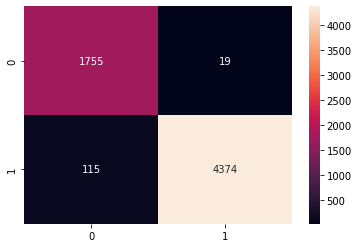

In [ ]:
best_random_grid = grid_result.best_estimator_
y_pred=best_random_grid.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
print("Recall Score {}".format(recall_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

sns.heatmap(cf_matrix, annot=True, fmt='.5g');

In [ ]:
# summarize results
print("%f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

0.966061 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.932837 with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.964587 with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.966061 with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.933686 with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.964966 with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.966016 with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.930223 with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.964989 with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.957593 with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.934491 with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.965637 with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.955292 with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.931675 with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.961570 with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.965190 with: {'C': 0.01, 'pen